In [1]:
import shutil
import time

import matplotlib.pyplot as plt
from fsspec.implementations.local import LocalFileSystem
from dask import delayed
from dask.distributed import Client, LocalCluster

from dummy_baskets import generate_dummy_baskets, run_index_basket_upload_test
from weave.index.index_pandas import IndexPandas
from weave.index.index_sqlite import IndexSQLite
from weave.index.index_sql import IndexSQL
from weave import Pantry

**Pandas Index Test (1000 Baskets, 1 Upload File, 1 MB File Size, 1 Basket Type)**

In these tests we will be analyzing the performance differences when more files are uploaded, files are larger, and the number of basket types are increased. This will done using the pandas index.

In [2]:
pantry_pandas = Pantry(IndexPandas, pantry_path="dummy_pantry", file_system=LocalFileSystem())

In [3]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)
pandas_time1 = run_index_basket_upload_test(basket_list=baskets, pantry=pantry_pandas)
print(f"1000 baskets, 1 upload file, 1 mb size files, 1 basket type: {pandas_time1} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

1000 baskets, 1 upload file, 1 mb size files, 1 basket type: 154.8368740081787 seconds


In [4]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=10, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)
pandas_time2 = run_index_basket_upload_test(basket_list=baskets, pantry=pantry_pandas)
print(f"1000 baskets, 10 upload files, 1 mb size files, 1 basket type: {pandas_time2} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

1000 baskets, 10 upload files, 1 mb size files, 1 basket type: 163.010409116745 seconds


Performance difference between uploading 10 files in each basket compared to 1 file in each basket

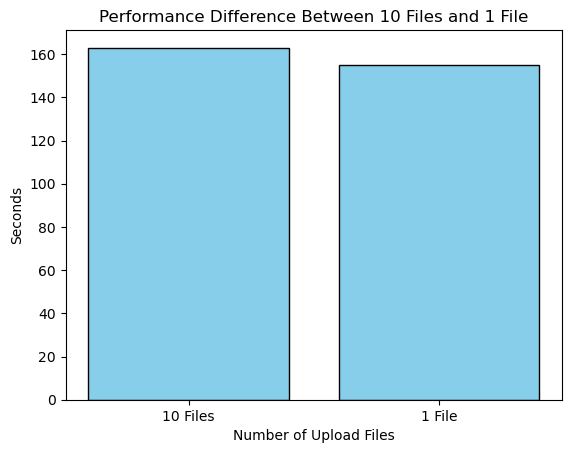

In [5]:
categories = ["10 Files", "1 File"]
values = [pandas_time2, pandas_time1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Number of Upload Files')
plt.ylabel('Seconds')
plt.title('Performance Difference Between 10 Files and 1 File')

plt.show()

As you can see there is almost no difference in performance when we upload multiple files in each basket compared to one file

In [6]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=2, file_path="dummy_txt", num_basket_types=1)
pandas_time3 = run_index_basket_upload_test(basket_list=baskets, pantry=pantry_pandas)
print(f"1000 baskets, 1 upload file, 2 mb size files, 1 basket type: {pandas_time3} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

1000 baskets, 1 upload file, 2 mb size files, 1 basket type: 193.69594144821167 seconds


Performance difference between uploading a 2 mb file in each basket compared to a 1 mb file in each basket

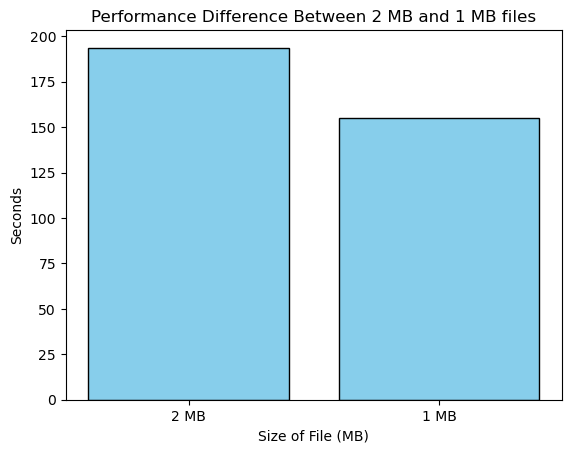

In [7]:
categories = ["2 MB", "1 MB"]
values = [pandas_time3, pandas_time1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Size of File (MB)')
plt.ylabel('Seconds')
plt.title('Performance Difference Between 2 MB and 1 MB files')

plt.show()

Once again, there is a very small performance difference between uploading a 2 MB file and a 1 MB file in each basket

In [8]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=10)
pandas_time4 = run_index_basket_upload_test(basket_list=baskets, pantry=pantry_pandas)
print(f"1000 baskets, 1 upload file, 1 mb size files, 10 basket types: {pandas_time4} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

1000 baskets, 1 upload file, 1 mb size files, 10 basket types: 155.42310762405396 seconds


Performance difference between uploading 10 basket types versus 1 basket types

Text(0.5, 1.0, 'Performance Difference Between 10 and 1 Basket Types')

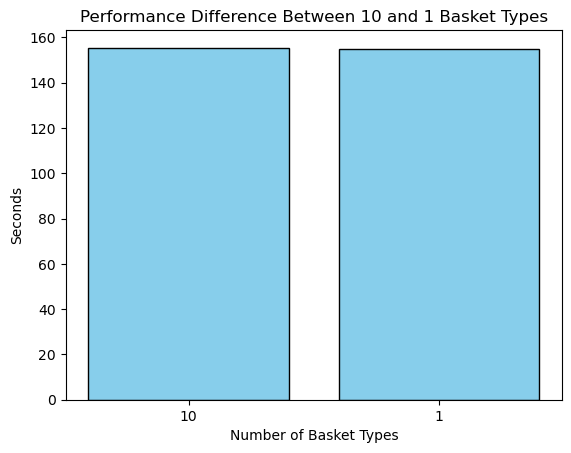

In [9]:
categories = ["10", "1"]
values = [pandas_time4, pandas_time1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Number of Basket Types')
plt.ylabel('Seconds')
plt.title('Performance Difference Between 10 and 1 Basket Types')

Once again, there seems to be no performance difference between number of basket types

**SQLite Index Test (1000 Baskets, 1 Upload File, 1 MB File Size, 1 Basket Type)**

In this test we will test the performance of uploading baskets using the same parameters as the first index pandas test. We will be using the SQLite index backend for these tests.

In [10]:
pantry_sqlite = Pantry(IndexSQLite, pantry_path="dummy_pantry", file_system=LocalFileSystem())

In [11]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)
sqlite_time1 = run_index_basket_upload_test(basket_list=baskets, pantry=pantry_sqlite)
print(f"1000 baskets, 1 upload file, 1 mb size files, 1 basket type: {sqlite_time1} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")
pantry_sqlite.index.drop_index()

1000 baskets, 1 upload file, 1 mb size files, 1 basket type: 30.350080966949463 seconds


Performance difference between the Pandas Index and the SQLite index

Text(0.5, 1.0, 'Performance Difference Between Pandas and SQLite Indexes')

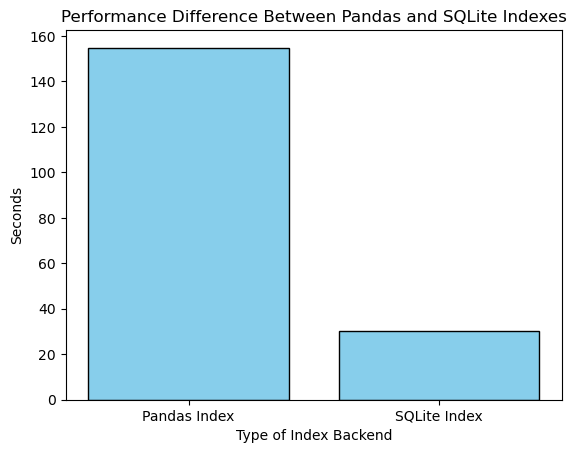

In [12]:
categories = ["Pandas Index", "SQLite Index"]
values = [pandas_time1, sqlite_time1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Type of Index Backend')
plt.ylabel('Seconds')
plt.title('Performance Difference Between Pandas and SQLite Indexes')

From the graph we can see there is a huge performance difference between the pandas and sqlite indexes

**SQL Index Test (1000 Baskets, 1 Upload File, 1 MB File Size, 1 Basket Type)**

In this test we will test the performance of uploading baskets using the same parameters as the first index pandas test and the first index sqlite test. We will be using the SQL index backend for these tests.

Please make sure to connect your SQL server and the proper environment variables are in place to run these tests. 

In [13]:
pantry_sql = Pantry(IndexSQL, pantry_path="dummy_pantry", file_system=LocalFileSystem())

In [14]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)
sql_time2 = run_index_basket_upload_test(basket_list=baskets, pantry=pantry_sql)
print(f"1000 baskets, 1 upload file, 1 mb size files, 1 basket type: {sql_time2} seconds")
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")

pantry_sql.index.drop_index()

1000 baskets, 1 upload file, 1 mb size files, 1 basket type: 23.104244709014893 seconds


Performance difference between the Pandas Index, the SQLite Index and the SQL Index.

Text(0.5, 1.0, 'Performance Difference Between Pandas, SQLite and SQL Indexes')

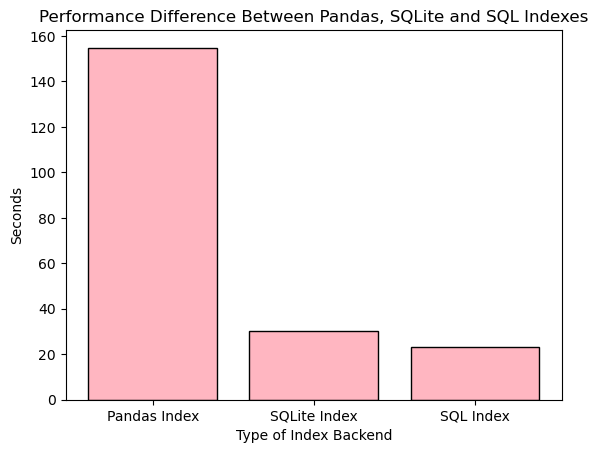

In [15]:
categories = ["Pandas Index", "SQLite Index", "SQL Index"]
values = [pandas_time1, sqlite_time1, sql_time2]

plt.bar(categories, values, color='lightpink', edgecolor='black')

plt.xlabel('Type of Index Backend')
plt.ylabel('Seconds')
plt.title('Performance Difference Between Pandas, SQLite and SQL Indexes')

Looking at the graph, we can see that the difference between the Pandas Index and the other indexes is quite large. While, the difference between the SQLite Index and the SQL index is a bit smaller. 

**SQLite Index Test (1000 Baskets, 1 Upload File, 1 MB File Size, 1 Basket Type) with 5 concurrent processes**

In this test we will test the performance of uploading baskets using the same parameters as the first index pandas test. We will be using the SQLite index backend with 5 concurrent processes for these tests.

In [16]:
pantry_sqlite_con = Pantry(IndexSQLite, pantry_path="dummy_pantry", file_system=LocalFileSystem())

In [17]:
# Set up a local cluster and client with 5 concurrent processes
cluster = LocalCluster(n_workers=5, threads_per_worker=1, processes=True)
client = Client(cluster)

In [18]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)

# Create a delayed function to upload all of our chunks
@delayed
def upload_chunk(chunk):
    pantry = Pantry(IndexSQLite, pantry_path="dummy_pantry", file_system=LocalFileSystem())
    run_index_basket_upload_test(chunk, pantry)

# Create 5 equal chunks each with 200 baskets
chunks = [baskets[i:i+200] for i in range(0, len(baskets), 200)]

# Upload all chunks in parallel
delayed_uploads = [upload_chunk(chunk) for chunk in chunks]

start_time = time.time()
results = client.compute(delayed_uploads, sync=True)
end_time = time.time()
sqlite_time_con1 = end_time - start_time
print(f"1000 baskets, 1 upload file, 1 mb size files, 1 basket type, 5 concurrent processes: {sqlite_time_con1} seconds")

1000 baskets, 1 upload file, 1 mb size files, 1 basket type, 5 concurrent processes: 20.074485540390015 seconds


Let's test that our index contains the correct number of baskets and basket types

In [19]:
pandas_index_df = pantry_sqlite_con.index.to_pandas_df()
print(f"Total number of baskets in index: {len(pandas_index_df)}")
print(f"Total number of unique uuids in index: {pandas_index_df["uuid"].nunique()}")

Total number of baskets in index: 1000
Total number of unique uuids in index: 1000


These values should both be 1000 so the index has been uploaded correctly

Cleanup our test files and pantry

In [20]:
shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")
pantry_sqlite_con.index.drop_index()

Performance Difference Between 1 and 5 Concurrent Processes Using the SQLite Index

Text(0.5, 1.0, 'Performance Difference Between 1 and 5 Concurrent Processes Using the SQLite Index')

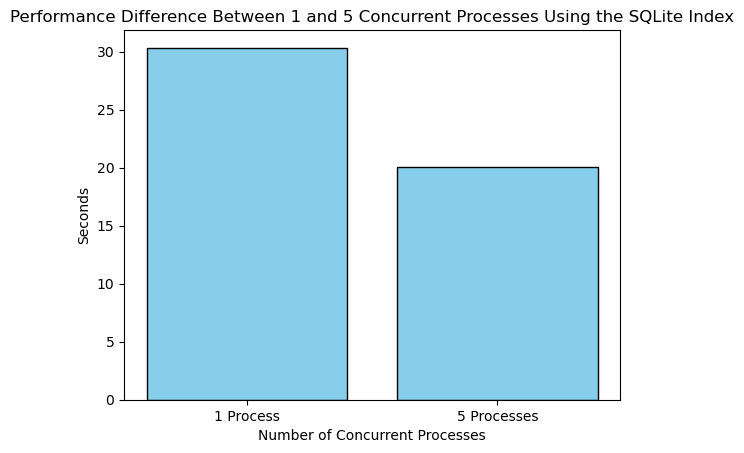

In [21]:
categories = ["1 Process", "5 Processes"]
values = [sqlite_time1, sqlite_time_con1]

plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.xlabel('Number of Concurrent Processes')
plt.ylabel('Seconds')
plt.title('Performance Difference Between 1 and 5 Concurrent Processes Using the SQLite Index')

**SQL Index Test (1000 Baskets, 1 Upload File, 1 MB File Size, 1 Basket Type, 5 Processes)**

In this test we will test the performance of uploading baskets using 5 processes each with 200 baskets. This will simulate 5 different users attempting to upload to the index at the same time. We will be using the SQL index backend for these tests.

Please make sure to connect your SQL server and the proper environment variables are in place to run these tests.

In [22]:
pantry_sql_c = Pantry(IndexSQL, pantry_path="dummy_pantry", file_system=LocalFileSystem())

In [23]:
cluster = LocalCluster(n_workers=5, threads_per_worker=1, processes=True)
client = Client(cluster)

c:\Users\carso\miniconda3\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54506 instead
  warnings.warn(


In [24]:
baskets = generate_dummy_baskets(basket_count=1000, file_count=1, file_size_mb=1, file_path="dummy_txt", num_basket_types=1)

# Create a delayed function to upload all of our chunks
@delayed
def upload_chunk(chunk):
    pantry = Pantry(IndexSQL, pantry_path="dummy_pantry", file_system=LocalFileSystem())
    run_index_basket_upload_test(chunk, pantry)

# Create 5 equal chunks each with 200 baskets
chunks = [baskets[i:i+200] for i in range(0, len(baskets), 200)]

# Upload all chunks in parallel
delayed_uploads = [upload_chunk(chunk) for chunk in chunks]

start_time = time.time()
results = client.compute(delayed_uploads, sync=True)
end_time = time.time()
sql_time_five = end_time - start_time
print(f"1000 baskets, 1 upload file, 1 mb size files, 1 basket type, 5 concurrent processes: {sql_time_five} seconds")

1000 baskets, 1 upload file, 1 mb size files, 1 basket type, 5 concurrent processes: 6.7158215045928955 seconds


In [25]:
pandas_indexs = pantry_sql_c.index.to_pandas_df()
print(f"Total number of baskets in index: {len(pandas_indexs)}")
print(f"Total number of unique uuids in index: {pandas_indexs["uuid"].nunique()}")

shutil.rmtree("dummy_txt")
shutil.rmtree("dummy_pantry")
pantry_sql_c.index.drop_index()

Total number of baskets in index: 1000
Total number of unique uuids in index: 1000


Comparing 5 processes to the SQL Index test using 1 process.

Text(0.5, 1.0, 'Performance Difference Between 1 process and 5 processes for SQL Index')

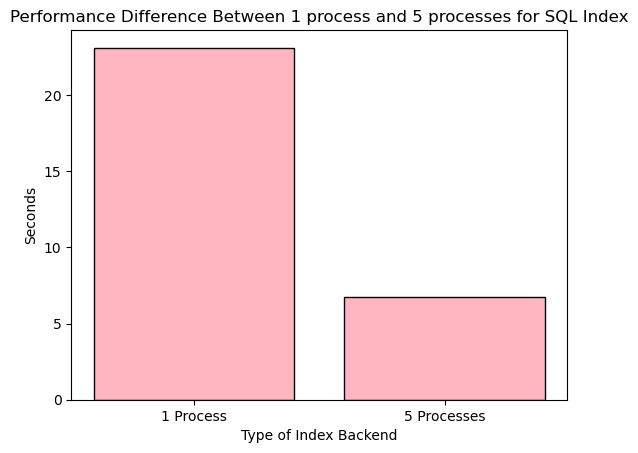

In [26]:
categories = ["1 Process", "5 Processes"]
values = [sql_time2, sql_time_five]

plt.bar(categories, values, color='lightpink', edgecolor='black')

plt.xlabel('Type of Index Backend')
plt.ylabel('Seconds')
plt.title('Performance Difference Between 1 process and 5 processes for SQL Index')